# Linear Regression

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from utils import load_data

## Problem statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## Dataset

In [112]:
X_train, y_train = load_data()

### View variables

In [113]:
print("Type of x_train:", type(X_train))
print("First five elements of x_train are:", X_train[:5, 0])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are: [6.1101 5.5277 8.5186 7.0032 5.8598]


In [114]:
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are: [17.592   9.1302 13.662  11.854   6.8233]


### Check the dimensions

In [115]:
print("The shape of x_train is:", X_train.shape)
print("The shape of y_train is:", y_train.shape)
print("Number of training examples is:", len(X_train))

The shape of x_train is: (97, 1)
The shape of y_train is: (97,)
Number of training examples is: 97


### Visualize data

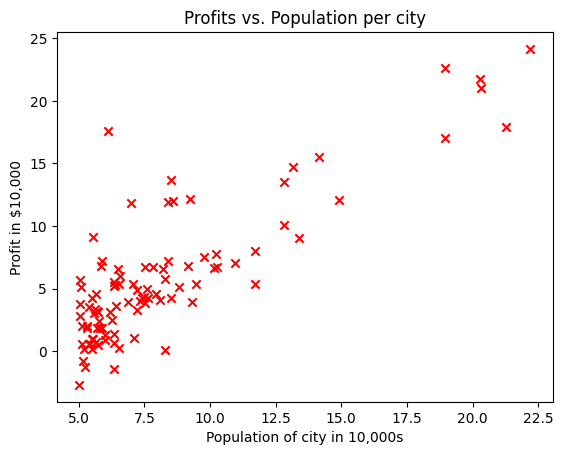

In [116]:
plt.scatter(X_train[:, 0], y_train, marker='x', c='r')

plt.title("Profits vs. Population per city")
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000')
plt.show()

### Linear Regression


In [117]:
def compute_cost(X, y, w, b):
    n = X.shape[0]
    cost = 0
    for i in range(n):
        cost += (np.dot(X[i], w) + b - y[i]) ** 2
    cost /= 2 * n
    return cost

In [118]:
def compute_gradient(X, y, w, b):
    n, d = X.shape
    dJ_dw = np.zeros(d)
    dJ_db = 0

    for i in range(n):
        err = np.dot(X[i], w) + b - y[i]
        for j in range(d):
            dJ_dw += err * X[i, j]
        dJ_db += err

    dJ_dw /= n
    dJ_db /= n
    return dJ_dw, dJ_db

In [119]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dJ_dw, dJ_db = compute_gradient(X, y, w, b)

        w -= alpha * dJ_dw
        b -= alpha * dJ_db

        if i % (num_iters / 10) == 0:
            print(f"Iteration {i:6d}. Cost: {compute_cost(X, y, w, b):.5e}. b = {b:0.5f}. w = {w}")

    return w, b

In [120]:
def run_gradient_descent(X, y, alpha, iters):
    n, d = X.shape

    init_w = np.zeros(d)
    init_b = 0

    w_out, b_out = gradient_descent(X, y, init_w, init_b, alpha, iters)

    print(f"w, b found by gradient descent: w = {w_out}, b = {b_out}")

    return w_out, b_out

In [121]:
final_w, final_b = run_gradient_descent(X_train, y_train, 0.01, 1500)

Iteration      0. Cost: 6.73719e+00. b = 0.05839. w = [0.6532885]
Iteration    150. Cost: 5.31138e+00. b = -0.86835. w = [0.88889492]
Iteration    300. Cost: 4.96261e+00. b = -1.58616. w = [0.96100738]
Iteration    450. Cost: 4.75962e+00. b = -2.13378. w = [1.0160217]
Iteration    600. Cost: 4.64147e+00. b = -2.55156. w = [1.05799192]
Iteration    750. Cost: 4.57271e+00. b = -2.87028. w = [1.09001083]
Iteration    900. Cost: 4.53269e+00. b = -3.11343. w = [1.11443794]
Iteration   1050. Cost: 4.50940e+00. b = -3.29893. w = [1.13307328]
Iteration   1200. Cost: 4.49585e+00. b = -3.44044. w = [1.14729011]
Iteration   1350. Cost: 4.48796e+00. b = -3.54841. w = [1.15813608]
w, b found by gradient descent: w = [1.16636235], b = -3.63029143940436


Text(0.5, 0, 'Population of city in 10,000s')

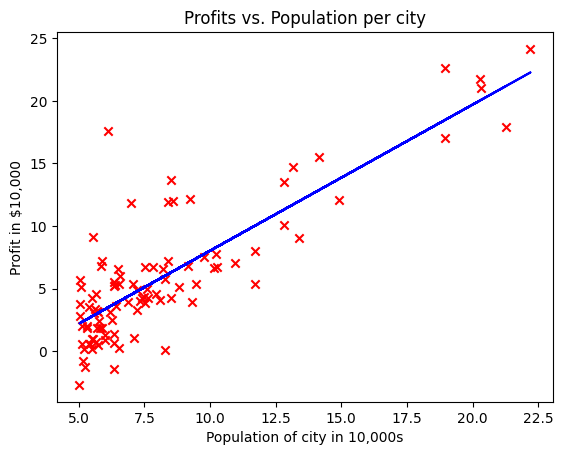

In [122]:
plt.plot(X_train[:, 0], np.dot(X_train, final_w) + final_b, c='b')

plt.scatter(X_train[:, 0], y_train, marker='x', c='r')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of city in 10,000s')

### Prediction

In [123]:
x = np.array([[3.5], [7.0]])
print(f'For population = 35,000 prediction of profit is ${(np.dot(x[0], final_w) + final_b) * 10000}')
print(f'For population = 70,000 prediction of profit is ${(np.dot(x[1], final_w) + final_b) * 10000}')

For population = 35,000 prediction of profit is $4519.7678677017675
For population = 70,000 prediction of profit is $45342.45012944714


### Multiple features
